# Load the dataset

Retrieve the 'train-00000-of-00001.parquet' file from Hugging Face using the provided link and save it to the directory of your Jupyter notebook.

https://huggingface.co/datasets/surrey-nlp/PLOD-CW

We will load the dataset and print th first few rows.

In [1]:
import pandas as pd

# Load the dataset
df_train = pd.read_parquet('train-00000-of-00001.parquet')

# Display the first few rows of the dataframe
print(df_train.head())

                                              tokens  \
0  [For, this, purpose, the, Gothenburg, Young, P...   
1  [The, following, physiological, traits, were, ...   
2  [Minor, H, antigen, alloimmune, responses, rea...   
3                 [EPI, =, Echo, planar, imaging, .]   
4  [Furthermore, ,, eNOS, -, derived, NO, S, -, n...   

                                            pos_tags  \
0  [ADP, DET, NOUN, DET, PROPN, PROPN, PROPN, PRO...   
1  [DET, ADJ, ADJ, NOUN, AUX, VERB, PUNCT, ADJ, N...   
2  [ADJ, PROPN, NOUN, ADJ, NOUN, ADV, VERB, ADP, ...   
3            [PROPN, PUNCT, NOUN, NOUN, NOUN, PUNCT]   
4  [ADV, PUNCT, PROPN, PUNCT, VERB, PROPN, NOUN, ...   

                                            ner_tags  
0  [B-O, B-O, B-O, B-O, B-LF, I-LF, I-LF, I-LF, I...  
1  [B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-LF, I-LF...  
2  [B-O, B-AC, B-O, B-O, B-O, B-O, B-O, B-O, B-O,...  
3                 [B-AC, B-O, B-LF, I-LF, I-LF, B-O]  
4  [B-O, B-O, B-AC, B-O, B-O, B-AC, B-O, B-O, B-O..

# Explore the columns in the dataset

We will examine each column in the loaded dataset.

In [2]:
# Explore the columns
print(df_train.columns)

Index(['tokens', 'pos_tags', 'ner_tags'], dtype='object')


# Check for missing values

Check if there are any missing values in each column

In [3]:
# Check for missing values
print(df_train.isnull().sum())

tokens      0
pos_tags    0
ner_tags    0
dtype: int64


# Exploring Unique values

We explore unique values in the 'tokens', 'pos_tags', and 'ner_tags' columns.

In [4]:
# Explore Unique Values in each column
import numpy as np

# Flatten the arrays in 'tokens' column
flat_tokens = np.concatenate(df_train['tokens'].values)
unique_tokens = np.unique(flat_tokens)
print("Unique values in 'tokens' column:", unique_tokens)

# Flatten the arrays in 'pos_tags' column
flat_pos_tags = np.concatenate(df_train['pos_tags'].values)
unique_pos_tags = np.unique(flat_pos_tags)
print("Unique values in 'POS tags' column:", unique_pos_tags)

# Flatten the arrays in 'ner_tags' column
flat_ner_tags = np.concatenate(df_train['ner_tags'].values)
unique_ner_tags = np.unique(flat_ner_tags)
print("Unique values in 'NER tags' column:", unique_ner_tags)

Unique values in 'tokens' column: ['"' '#' '$' ... '♂' '（' '）']
Unique values in 'POS tags' column: ['ADJ' 'ADP' 'ADV' 'AUX' 'CCONJ' 'DET' 'INTJ' 'NOUN' 'NUM' 'PART' 'PRON'
 'PROPN' 'PUNCT' 'SCONJ' 'SYM' 'VERB' 'X']
Unique values in 'NER tags' column: ['B-AC' 'B-LF' 'B-O' 'I-LF']


# Visualizing Distributions

## Bar Plot of NER Tags

We visualize the frequency distribution of Named Entity Recognition (NER) tags.

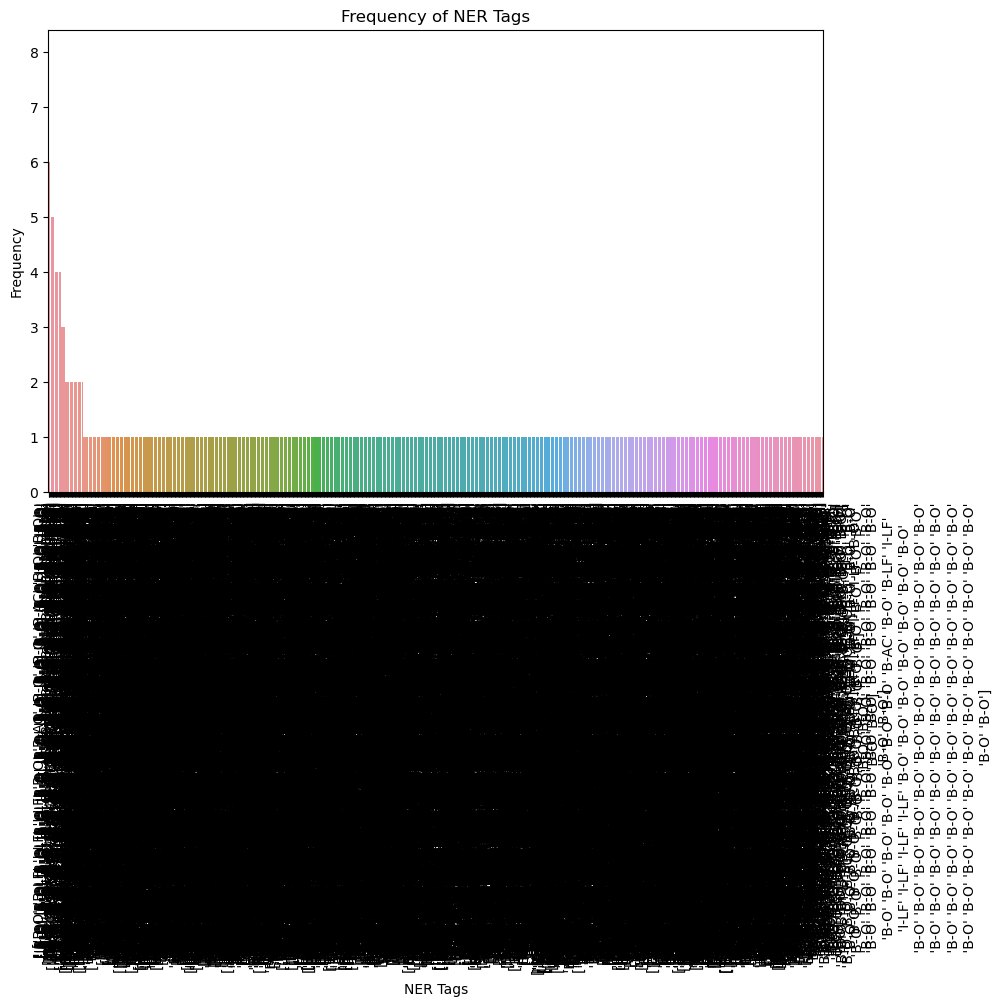

In [5]:
#Visualize Distributions

import matplotlib.pyplot as plt
import seaborn as sns

# Convert NER tags to strings
ner_tags_str = df_train['ner_tags'].astype(str)

# Count the frequency of each NER tag
ner_tag_counts = ner_tags_str.value_counts()

# Convert to DataFrame
ner_tag_counts_df = pd.DataFrame({'NER Tag': ner_tag_counts.index, 'Frequency': ner_tag_counts.values})

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='NER Tag', y='Frequency', data=ner_tag_counts_df)
plt.xlabel('NER Tags')
plt.ylabel('Frequency')
plt.title('Frequency of NER Tags')
plt.xticks(rotation=90)
plt.show()

### Visualizing NER Tag Distribution

The bar plot above represents the frequency distribution of NER tags in our training dataset. Each bar corresponds to a unique NER tag, and its height reflects the number of times the tag appears in the dataset. This visualization is crucial as it helps us understand the imbalance and prevalence of each tag.

From the plot, we can observe that:

- Some tags occur very frequently, indicating common entities, while others are rarer, which might be due to the specific nature of the entities or a class imbalance in our dataset.
- The distribution can inform us about the complexity of our NER task. A higher number of frequent tags may imply a more challenging task due to the diversity of entities.
- Tags with very low frequencies might be underrepresented in the model training process, potentially leading to poorer model performance on these specific entities.

Understanding this distribution is important for making informed decisions about model architecture, choice of loss function (especially for handling class imbalance), and evaluation metrics. If certain tags are indeed underrepresented, we may consider techniques such as oversampling, undersampling, or applying class weights during model training to address this imbalance.


# Word Cloud

We generate a word cloud to visualize the most frequent words in the dataset.

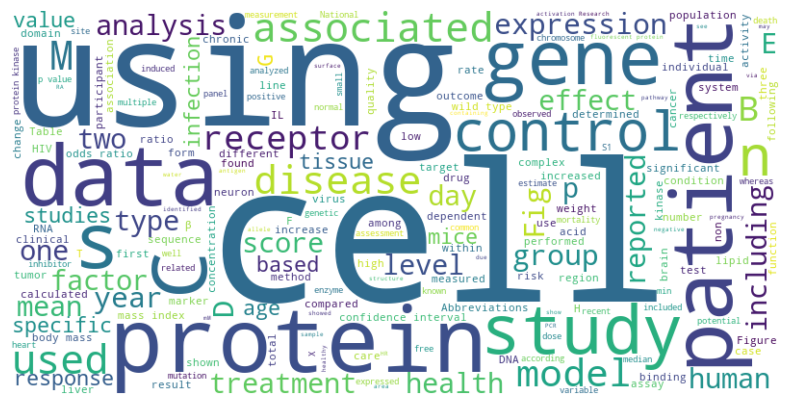

In [6]:
# Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from itertools import chain

# Flatten the list of lists into a single list
flat_tokens_train = list(chain.from_iterable(df_train['tokens']))

# Join tokens back into a single string
text_data_train = ' '.join(flat_tokens_train)

# Generate the word cloud
wordcloud_train = WordCloud(width=800, height=400, background_color='white').generate(text_data_train)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_train, interpolation='bilinear')
plt.axis('off')
plt.show()

### Word Cloud for Text Data Analysis

The word cloud above illustrates the distribution of word frequencies within the training corpus. Common terms are displayed in larger fonts, allowing us to quickly identify the most prominent words that characterize the dataset. Such a visualization is particularly useful for several reasons:

1. **Data Overview**: It provides a quick, intuitive understanding of the text data, highlighting prevalent themes and concepts.
2. **Data Cleaning Verification**: By revealing the most common words, we can verify whether our text preprocessing steps, like stopword removal, have been effective.
3. **Initial Insights**: We can gather initial insights regarding the context and the domain from which the data was drawn. In this dataset, words like 'gene', 'associated', 'protein', and 'disease' suggest a strong biomedical or genetic research context.
4. **Feature Engineering**: Recognizing key terms can inform the creation of additional features for machine learning models, such as flags for specific keywords that might be predictive.
5. **Bias Detection**: The word cloud can also point out any unexpected biases in the dataset, such as overrepresentation of certain terms.

While the word cloud offers a useful starting point for exploring the dataset, it is also essential to delve deeper into the data with more rigorous quantitative methods for a complete understanding.

# Histogram of Text Lengths

We visualize the distribution of text lengths in the dataset using a histogram.

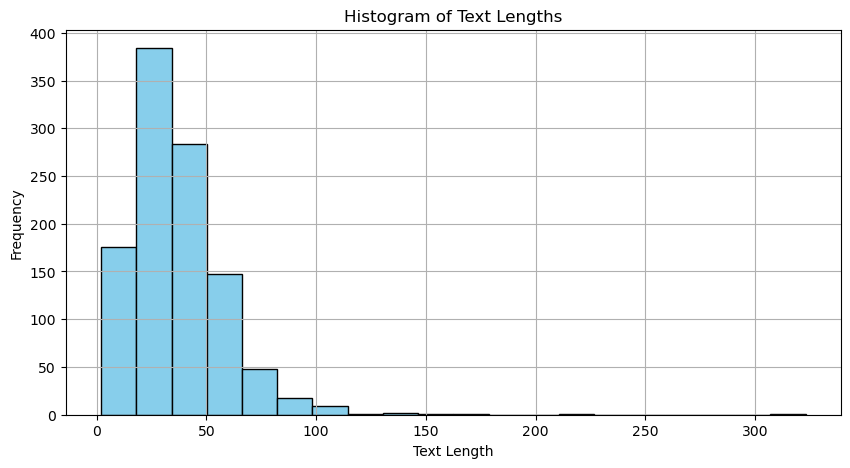

In [7]:
# Histogram of Text Lengths
text_lengths_train = df_train['tokens'].apply(len)
plt.figure(figsize=(10, 5))
plt.hist(text_lengths_train, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Histogram of Text Lengths')
plt.grid(True)
plt.show()

### Analysis of Text Length Distribution

The histogram displayed above visualizes the lengths of texts within our dataset, measured by the count of tokens in each text sample. Each bar represents the frequency of text samples falling within a range of lengths, providing us with insights into the variation of text sizes we are dealing with.

Observations from the histogram:
- **Central Tendency**: The distribution appears to be right-skewed, meaning most of the text samples have fewer tokens, with the frequency gradually decreasing as text length increases.
- **Outliers and Extremes**: There are fewer instances of texts with a very high token count, indicating that longer texts are outliers in this dataset.
- **Implications for Modeling**: Knowing the distribution of text lengths is essential for setting appropriate sequence padding lengths for neural network models, such as LSTM networks, which require fixed-length inputs. This will ensure that we can efficiently handle most texts without excessive padding or truncation.
- **Data Preprocessing Decisions**: Understanding the common text lengths can guide us in preprocessing steps. For example, if there are many very short texts, it might be useful to combine them or exclude them based on the context of the task to improve model performance.
- **Resource Allocation**: The length of texts can impact both the training time and computational resources needed. Shorter texts will generally lead to faster training times, which is beneficial when scaling up to larger datasets.

In conclusion, this histogram provides valuable information that helps in making informed decisions regarding model architecture and training processes. It can also aid in further exploratory data analysis to understand the characteristics of the dataset better.


# Data Distribution Analysis

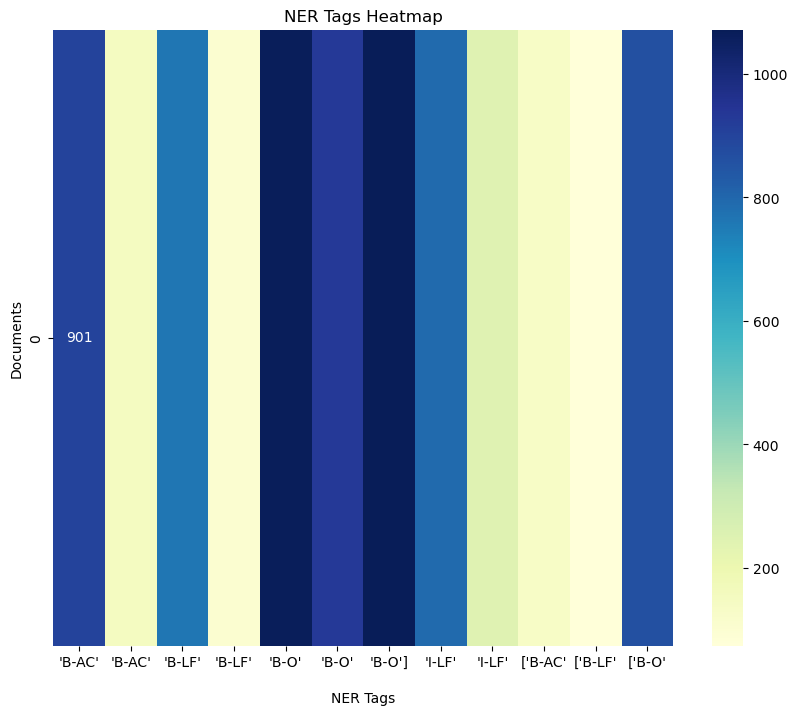

In [8]:
# Handle missing values by replacing them with an empty string
df_train_new = df_train.copy()
df_train_new['ner_tags'] = df_train_new['ner_tags'].fillna('')

# Convert 'ner_tags' column to strings
df_train_new['ner_tags'] = df_train_new['ner_tags'].astype(str)

# Create dummy variables for each NER tag
ner_tags_dummies = df_train_new['ner_tags'].str.get_dummies(sep=' ')

# Sum up the counts for each tag
ner_tags_counts = ner_tags_dummies.sum()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(ner_tags_counts).T, cmap='YlGnBu', annot=True, fmt='g')
plt.xlabel('NER Tags')
plt.ylabel('Documents')
plt.title('NER Tags Heatmap')
plt.show()

## Exploratory Data Analysis

**Sequence Length Distribution:**
The histogram illustrates the distribution of sequence lengths in the dataset. Understanding the range and frequency of text lengths can provide valuable insights into the nature of the data. The kernel density estimate (KDE) plot overlaid on the histogram offers a smoothed representation of the probability density function, aiding in understanding the overall pattern of sequence lengths.

**Label Counts per Sequence Distribution:**
This visualization presents the distribution of label counts per sequence. By aggregating the counts of each label within a sequence, we gain insight into the frequency and variability of label counts across all sequences. Understanding these distributions is crucial for preprocessing strategies and model development.

# Visualizing Sequence Lengths and Label Counts

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


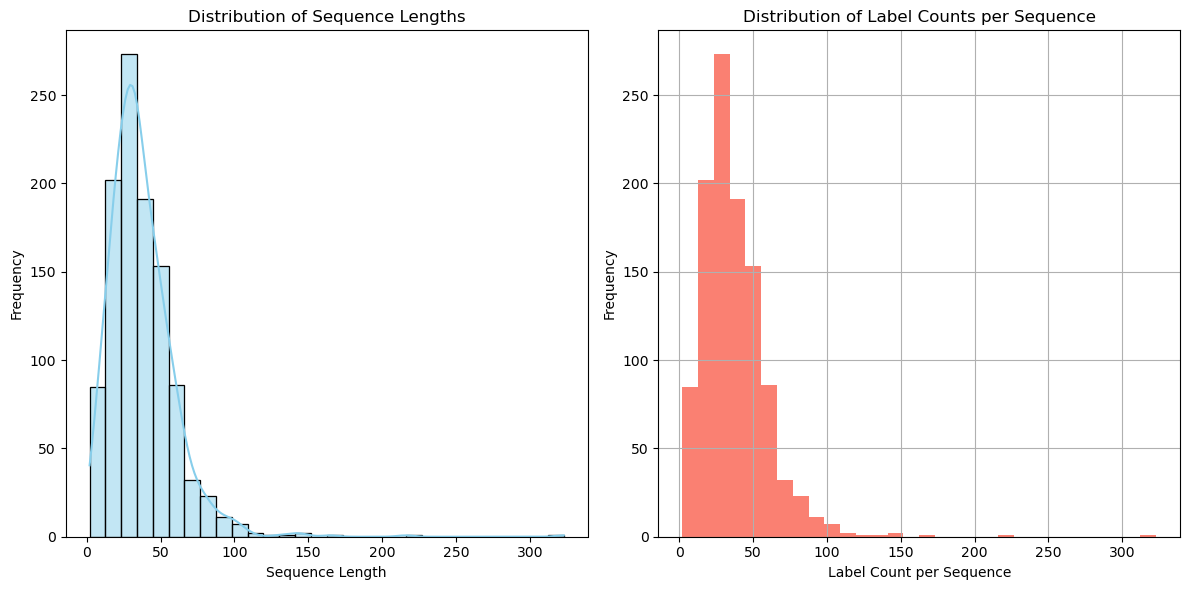

In [9]:
# Calculate sequence lengths
sequence_lengths = df_train['tokens'].apply(len)

# Calculate label counts per sequence
label_counts_per_sequence = df_train['ner_tags'].apply(lambda x: pd.Series(x).value_counts())

# Plot distribution of sequence lengths
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(sequence_lengths, bins=30, kde=True, color='skyblue')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths')

# Plot distribution of label counts per sequence
plt.subplot(1, 2, 2)
label_counts_per_sequence.sum(axis=1).hist(bins=30, color='salmon')
plt.xlabel('Label Count per Sequence')
plt.ylabel('Frequency')
plt.title('Distribution of Label Counts per Sequence')

plt.tight_layout()
plt.show()

## Visualizing Sequence Lengths and Label Counts

In this section, we explore the distribution of sequence lengths and label counts per sequence in our dataset. This analysis helps us understand the typical characteristics of our data and identify any patterns or anomalies that may influence our modeling approach.

**Explanation:**

We create two visualizations:
1. **Sequence Length Distribution:** This histogram shows the distribution of sequence lengths in our dataset. The x-axis represents the sequence length, while the y-axis indicates the frequency of sequences falling within each length range. The KDE (Kernel Density Estimation) plot overlay provides a smoothed estimate of the probability density function of the sequence lengths.

2. **Label Counts per Sequence Distribution:** Here, we plot the distribution of label counts per sequence. We sum the counts of each label within a sequence to obtain the total label count per sequence. The histogram displays the frequency of different label count ranges across all sequences in the dataset.

These visualizations offer insights into the typical range of sequence lengths and label counts in our data, guiding preprocessing and modeling decisions.


# Load the Test Dataset

Load the test dataset using Pandas.

In [10]:
import pandas as pd

# Load the dataset
df_test = pd.read_parquet('test-00000-of-00001.parquet')

# Display the first few rows of the dataframe
print(df_test.head())

                                              tokens  \
0  [Abbreviations, :, GEMS, ,, Global, Enteric, M...   
1  [Fractions, from, FPLC, purification, were, tr...   
2  [We, developed, a, variant, of, gene, set, enr...   
3  [Red, represents, samples, having, the, normal...   
4  [(, D, ), Lysates, of, rectal, cancer, tissues...   

                                            pos_tags  \
0  [NOUN, PUNCT, PROPN, PUNCT, PROPN, PROPN, PROP...   
1  [NOUN, ADP, PROPN, NOUN, AUX, VERB, ADP, PROPN...   
2  [PRON, VERB, DET, NOUN, ADP, NOUN, NOUN, NOUN,...   
3  [NOUN, VERB, NOUN, VERB, DET, VERB, PROPN, CCO...   
4  [PUNCT, X, PUNCT, NOUN, ADP, ADJ, NOUN, NOUN, ...   

                                            ner_tags  
0  [B-O, B-O, B-AC, B-O, B-LF, I-LF, I-LF, I-LF, ...  
1  [B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, ...  
2  [B-O, B-O, B-O, B-O, B-O, B-LF, I-LF, I-LF, I-...  
3  [B-O, B-O, B-O, B-O, B-O, B-O, B-AC, B-O, B-O,...  
4  [B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, ..

# Encode Labels
We encode the NER tags using MultiLabelBinarizer.

In [11]:
from sklearn.preprocessing import MultiLabelBinarizer

# Extract the ner_tags column from your training data and test data
x_train_labels = df_train["ner_tags"]
y_train_labels = df_test["ner_tags"]

# Convert the ner_tags column into a list of lists
x_labels_list = x_train_labels.tolist()
y_labels_list = y_train_labels.tolist()

# Create an instance of MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the list of lists of labels
y_train = mlb.fit_transform(x_labels_list)
y_test = mlb.fit_transform(y_labels_list)

# Print the encoded labels
print(y_train)
print(y_train.shape)
print(y_test.shape)

[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 ...
 [1 1 1 1]
 [1 1 1 1]
 [0 0 1 0]]
(1072, 4)
(153, 4)


In [12]:
# Join the lists in the tokens
X_train = [' '.join(sublist) for sublist in df_train['tokens']]

X_test = [' '.join(sublist) for sublist in df_test['tokens']]

# Experiment 1
# Exploring different vectorization techniques combined with Artificial Neural Networks (ANNs) for multi-label classification on NER tags.

1a. TF-IDF Encoding:
   - We use TF-IDF encoding to represent text data.
   - The model employs a simple feedforward neural network (ANN) with dense layers for multi-label classification.

1b. Word2Vec Encoding:
   - Word2Vec embeddings are used to represent text data.
   - We create a Word2Vec model and average word vectors for each document.
   - The ANN model with dense layers is used for multi-label classification.

1c. GloVe Encoding:
   - GloVe embeddings are used for text representation.
   - We load pre-trained GloVe embeddings and use them as input for the ANN model with dense layers for multi-label classification.

## 1a. TF-IDF with ANN

## TF-IDF Encoding
Use TF-IDF vectorization to convert text data into numerical vectors, limiting the features to the top 5000.

In [13]:
!pip install tensorflow
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, accuracy_score,  confusion_matrix, f1_score

# TF-IDF encoding
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Define the ANN model
model = Sequential([
    Dense(512, input_shape=(X_train_tfidf.shape[1],), activation='relu'),
    Dense(256, activation='relu'),
    Dense(y_train.shape[1], activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_tfidf, y_train, validation_data=(X_test_tfidf, y_test), epochs=10, batch_size=32, verbose=1)

# Evaluate the model on the test set
y_pred = model.predict(X_test_tfidf)
y_pred_binary = (y_pred > 0.5)  # Convert probabilities to binary predictions

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred_binary.argmax(axis=1))
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print(classification_report(y_test, y_pred_binary, target_names=mlb.classes_))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

# Calculate and print F1 Score
f1 = f1_score(y_test, y_pred_binary, average='weighted')
print("F1 Score:", f1)

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.0927 - loss: 0.5701 - val_accuracy: 0.1438 - val_loss: 0.3848
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.1029 - loss: 0.2896 - val_accuracy: 0.1438 - val_loss: 0.3769
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0935 - loss: 0.1789 - val_accuracy: 0.1438 - val_loss: 0.3652
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0916 - loss: 0.1026 - val_accuracy: 0.1438 - val_loss: 0.4697
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1037 - loss: 0.0425 - val_accuracy: 0.1438 - val_loss: 0.5564
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0998 - loss: 0.0198 - val_accuracy: 0.1438 - val_loss: 0.5835
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0881 - loss: 0.0105 - val_accuracy: 0.1438 - val_loss: 0.6134
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.1019 - loss: 0.0057 - val_accuracy: 0.1438 - v

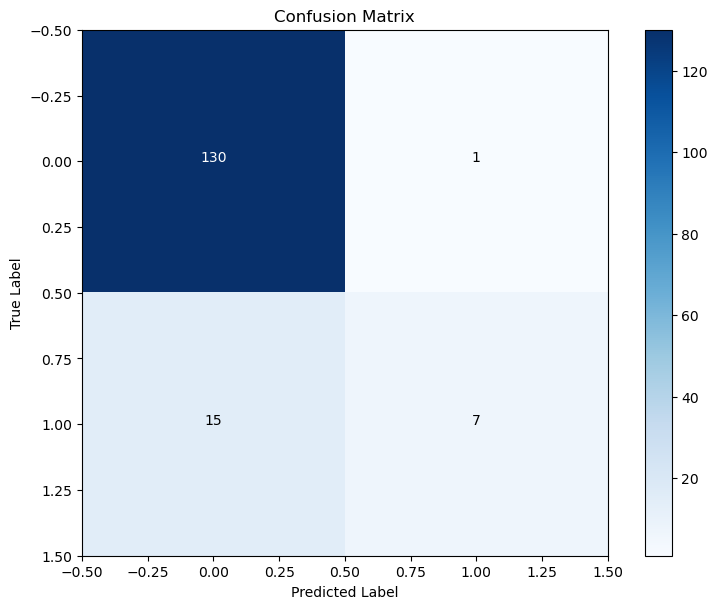

In [14]:
import numpy as np
import itertools

# Function to plot confusion matrix
def plot_confusion_matrix(cm, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f' if normalize else 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, normalize=False, title='Confusion Matrix')
plt.show()

## 1b. Word 2 Vec with ANN

## Data PreparationWe define a new Word2Vec model using Gensim's Word2Vec class, specifying parameters like vector size, window size etc.
.

In [15]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from gensim.models import Word2Vec
import numpy as np

# Define the Word2Vec model
word2vec_model = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=1, workers=4)

# Function to average word vectors for each document
def document_vector(doc):
    doc = [word for word in doc if word in word2vec_model.wv.key_to_index]
    if len(doc) > 0:
        return np.mean([word2vec_model.wv.get_vector(word) for word in doc], axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)  # Return zero vector if no words found

# Convert tokenized documents to document vectors
X_train_word2vec = np.array([document_vector(doc) for doc in X_train])
X_test_word2vec = np.array([document_vector(doc) for doc in X_test])

# Define the ANN model
model = Sequential([
    Dense(512, input_shape=(X_train_word2vec.shape[1],), activation='relu'),
    Dense(256, activation='relu'),
    Dense(y_train.shape[1], activation='sigmoid')  # Output layer with sigmoid activation for multi-label classification
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_word2vec, y_train, validation_data=(X_test_word2vec, y_test), epochs=10, batch_size=32, verbose=1)

# Evaluate the model on the test set
y_pred = model.predict(X_test_word2vec)
y_pred_binary = (y_pred > 0.5)  # Convert probabilities to binary predictions

# Print classification report
print(classification_report(y_test, y_pred_binary, target_names=mlb.classes_))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred_binary.argmax(axis=1))
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print F1 Score
f1 = f1_score(y_test, y_pred_binary, average='weighted')
print("F1 Score:", f1)

Epoch 1/10


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.0910 - loss: 0.1538 - val_accuracy: 0.1438 - val_loss: 0.1330
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0952 - loss: 0.1083 - val_accuracy: 0.1438 - val_loss: 0.1237
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1063 - loss: 0.1080 - val_accuracy: 0.1438 - val_loss: 0.1207
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1088 - loss: 0.1100 - val_accuracy: 0.1438 - val_loss: 0.1203
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1117 - loss: 0.1073 - val_accuracy: 0.1438 - val_loss: 0.1201
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0955 - loss: 0.1074 - val_accuracy: 0.1438 - val_loss: 0.1207
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1101 - loss: 0.1082 - val_accuracy: 0.1438 - val_loss: 0.1198
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1120 - loss: 0.1112 - val_accuracy: 0.1438 - val_loss: 0.1201
Ep

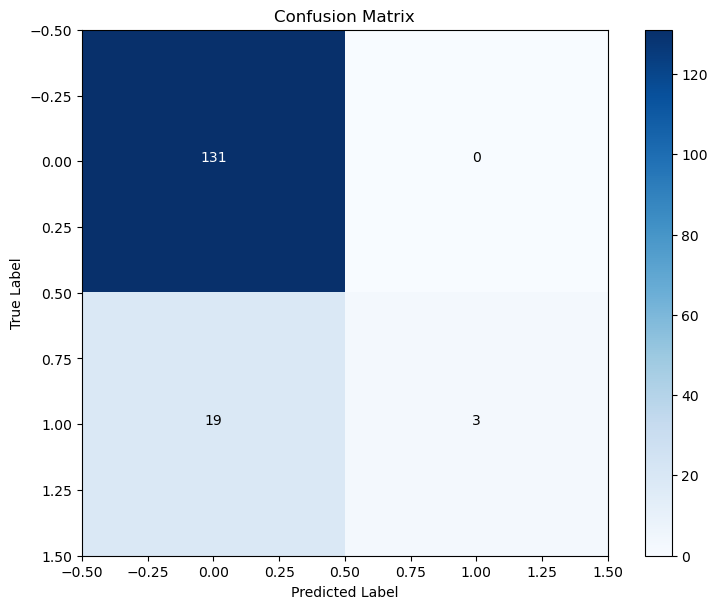

In [16]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f' if normalize else 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, normalize=False, title='Confusion Matrix')
plt.show()

## 1c. Glove Embeddings with ANN

## Data PreparationBefore executing the following cell, download the pre-trained GloVe embeddings from the provided link and save them in the directory where the Jupyter notebook is located.

http://nlp.stanford.edu/data/glove.42B.300d.zip.

In [17]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from gensim.models import KeyedVectors
import numpy as np

def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, encoding="utf8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

# Load the pre-trained GloVe embeddings
glove_file_path = r"C:\Users\User\Documents\glove.6B\glove.6B.50d.txt"
word_vectors = load_glove_embeddings(glove_file_path)

# Function to average word vectors for each document
def document_vector(doc):
    doc = [word for word in doc if word in word_vectors]
    if len(doc) > 0:
        return np.mean([word_vectors[word] for word in doc], axis=0)
    else:
        return np.zeros(word_vectors.vector_size)  # Return zero vector if no words found

# Convert tokenized documents to document vectors
X_train_glove = np.array([document_vector(doc) for doc in X_train])
X_test_glove = np.array([document_vector(doc) for doc in X_test])

# Define the ANN model
model = Sequential([
    Dense(512, input_shape=(X_train_glove.shape[1],), activation='relu'),
    Dense(256, activation='relu'),
    Dense(y_train.shape[1], activation='sigmoid')  # Output layer with sigmoid activation for multi-label classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_glove, y_train, validation_data=(X_test_glove, y_test), epochs=10, batch_size=32, verbose=1)

# Evaluate the model on the test set
y_pred = model.predict(X_test_glove)
y_pred_binary = (y_pred > 0.5)  # Convert probabilities to binary predictions

# Print classification report
print(classification_report(y_test, y_pred_binary, target_names=mlb.classes_))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred_binary.argmax(axis=1))
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print F1 Score
f1 = f1_score(y_test, y_pred_binary, average='weighted')
print("F1 Score:", f1)

Epoch 1/10


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1823 - loss: 0.4729 - val_accuracy: 0.1438 - val_loss: 0.3979
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0991 - loss: 0.3416 - val_accuracy: 0.1438 - val_loss: 0.3906
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1034 - loss: 0.3526 - val_accuracy: 0.1438 - val_loss: 0.3931
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0893 - loss: 0.3167 - val_accuracy: 0.1438 - val_loss: 0.3896
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0874 - loss: 0.3304 - val_accuracy: 0.1438 - val_loss: 0.3857
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1062 - loss: 0.3468 - val_accuracy: 0.1438 - val_loss: 0.3704
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1021 - loss: 0.3345 - val_accuracy: 0.1438 - val_loss: 0.3713
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0953 - loss: 0.3363 - val_accuracy: 0.1438 - val_loss: 0.4064
Ep

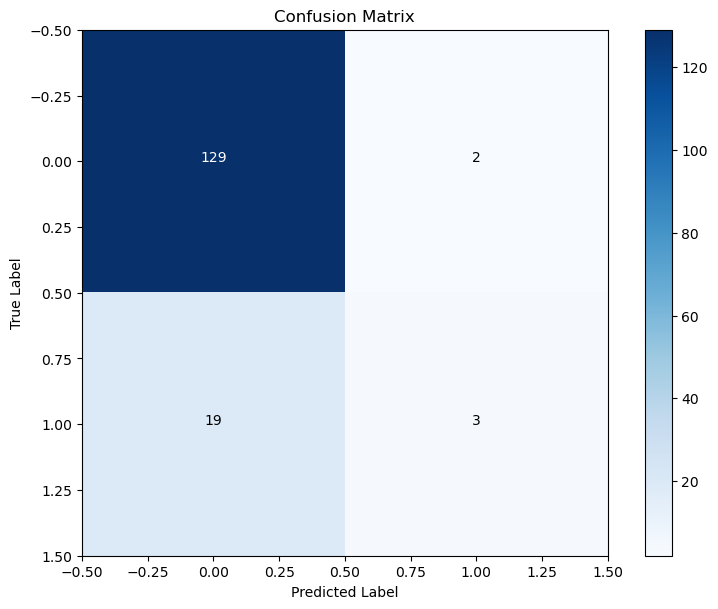

In [18]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f' if normalize else 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, normalize=False, title='Confusion Matrix')
plt.show()

# Experiment 2

# Different Algorithms with TF-IDF encoding

2a. RNN:
   - We use a SimpleRNN layer followed by dense layers for multi-label classification. TF-IDF vectors are reshaped to include the time step dimension.

2b. LSTM:
   - The model consists of an LSTM layer followed by dense layers for multi-label classification. TF-IDF vectors are reshaped to include the time step dimension.

2c. GRU:
   - The model includes a GRU layer followed by dense layers for multi-label classification. TF-IDF vectors are reshaped to include the time step dimension.

## 2a. RNN

- Define a simple RNN model with one RNN layer, followed by two dense layers.
- Use ReLU activation for the RNN and dense layers.
- Output layer uses sigmoid activation for multi-label classification.ss.

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Reshape TF-IDF vectors to include the time step dimension
X_train_tfidf_reshaped = X_train_tfidf.toarray().reshape(X_train_tfidf.shape[0], 1, X_train_tfidf.shape[1])
X_test_tfidf_reshaped = X_test_tfidf.toarray().reshape(X_test_tfidf.shape[0], 1, X_test_tfidf.shape[1])

# Define the RNN model
model = Sequential([
    SimpleRNN(128, input_shape=(X_train_tfidf_reshaped.shape[1], X_train_tfidf_reshaped.shape[2]), activation='relu'),
    Dense(256, activation='relu'),
    Dense(y_train.shape[1], activation='sigmoid')  # Output layer with sigmoid activation for multi-label classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_tfidf_reshaped, y_train, validation_data=(X_test_tfidf_reshaped, y_test), epochs=10, batch_size=32, verbose=1)

# Evaluate the model on the test set
y_pred = model.predict(X_test_tfidf_reshaped)
y_pred_binary = (y_pred > 0.5)  # Convert probabilities to binary predictions

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred_binary.argmax(axis=1))
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print(classification_report(y_test, y_pred_binary, target_names=mlb.classes_))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

# Calculate and print F1 Score
f1 = f1_score(y_test, y_pred_binary, average='weighted')
print("F1 Score:", f1)

Epoch 1/10


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.1637 - loss: 0.6222 - val_accuracy: 0.1438 - val_loss: 0.4245
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1032 - loss: 0.3127 - val_accuracy: 0.1438 - val_loss: 0.3747
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0953 - loss: 0.2464 - val_accuracy: 0.1438 - val_loss: 0.3532
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0964 - loss: 0.1669 - val_accuracy: 0.1438 - val_loss: 0.3555
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1086 - loss: 0.0918 - val_accuracy: 0.1438 - val_loss: 0.4495
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1031 - loss: 0.0448 - val_accuracy: 0.1438 - val_loss: 0.5538
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1155 - loss: 0.0257 - val_accuracy: 0.1438 - val_loss: 0.5843
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0866 - loss: 0.0146 - val_accuracy: 0.1438 - val_loss: 0.

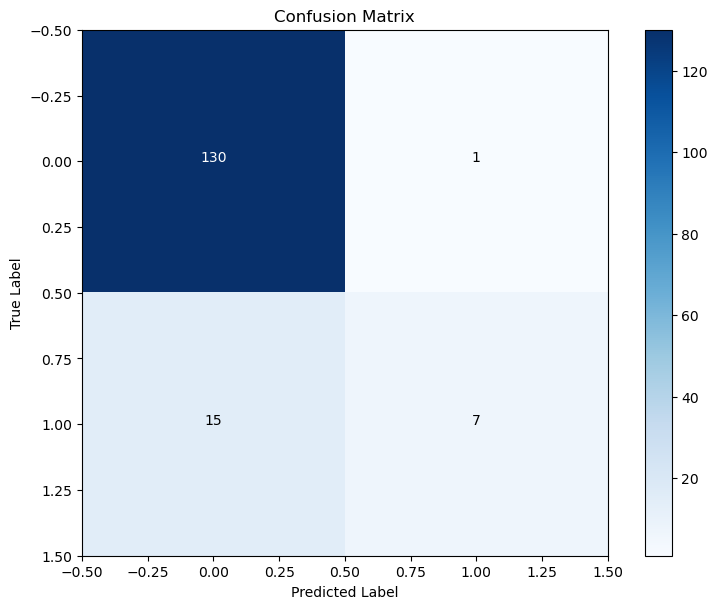

In [20]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f' if normalize else 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, normalize=False, title='Confusion Matrix')
plt.show()

## 2b. LSTM based Model

- Define an LSTM model with one LSTM layer and two dense layers.
- Use ReLU activation for the LSTM and dense layers.
- Output layer uses sigmoid activation for multi-label classification.

In [23]:
from tensorflow.keras.layers import LSTM

# Define the LSTM model
model = Sequential([
    LSTM(128, input_shape=(X_train_tfidf_reshaped.shape[1], X_train_tfidf_reshaped.shape[2]), activation='relu'),
    Dense(256, activation='relu'),
    Dense(y_train.shape[1], activation='sigmoid')  # Output layer with sigmoid activation for multi-label classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_tfidf_reshaped, y_train, validation_data=(X_test_tfidf_reshaped, y_test), epochs=10, batch_size=32, verbose=1)

# Evaluate the model on the test set
y_pred = model.predict(X_test_tfidf_reshaped)
y_pred_binary = (y_pred > 0.5)  # Convert probabilities to binary predictions

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred_binary.argmax(axis=1))
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print(classification_report(y_test, y_pred_binary, target_names=mlb.classes_))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

# Calculate and print F1 Score
f1 = f1_score(y_test, y_pred_binary, average='weighted')
print("F1 Score:", f1)

Epoch 1/10


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.1034 - loss: 0.6607 - val_accuracy: 0.1438 - val_loss: 0.4821
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.1072 - loss: 0.3835 - val_accuracy: 0.1438 - val_loss: 0.3985
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.1049 - loss: 0.2978 - val_accuracy: 0.1438 - val_loss: 0.3805
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.0905 - loss: 0.2396 - val_accuracy: 0.1438 - val_loss: 0.3614
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.0954 - loss: 0.1656 - val_accuracy: 0.1438 - val_loss: 0.3728
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.1047 - loss: 0.1039 - val_accuracy: 0.1438 - val_loss: 0.4426
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.1029 - loss: 0.0585 - val_accuracy: 0.1438 - val_loss: 0.5288
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.1003 - loss: 0.0409 - val_accuracy: 0.1438 - val_loss: 0.

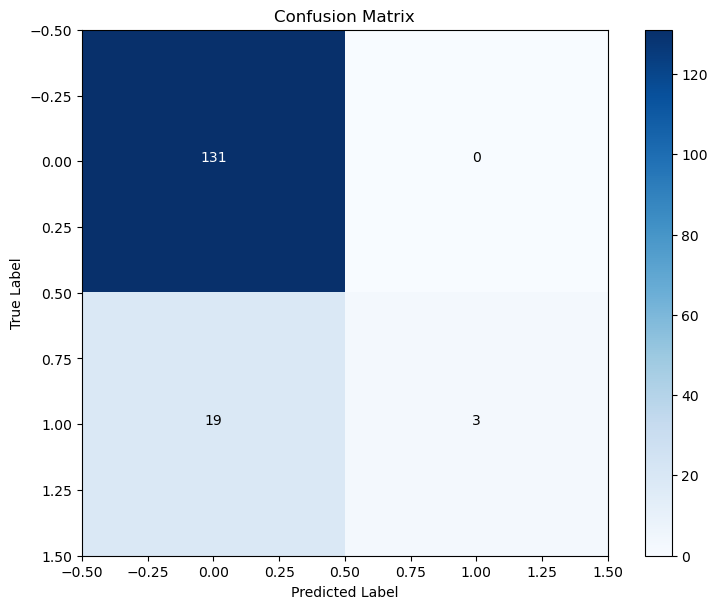

In [24]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f' if normalize else 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, normalize=False, title='Confusion Matrix')
plt.show()

## 2c. GRU based model

- Define a GRU model with one GRU layer and two dense layers.
- Use ReLU activation for the GRU and dense layers.
- Output layer uses sigmoid activation for multi-label classification.

In [25]:
from tensorflow.keras.layers import GRU

# Define the GRU model
model = Sequential([
    GRU(128, input_shape=(X_train_tfidf_reshaped.shape[1], X_train_tfidf_reshaped.shape[2]), activation='relu'),
    Dense(256, activation='relu'),
    Dense(y_train.shape[1], activation='sigmoid')  # Output layer with sigmoid activation for multi-label classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_tfidf_reshaped, y_train, validation_data=(X_test_tfidf_reshaped, y_test), epochs=10, batch_size=32, verbose=1)

# Evaluate the model on the test set
y_pred = model.predict(X_test_tfidf_reshaped)
y_pred_binary = (y_pred > 0.5)  # Convert probabilities to binary predictions

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred_binary.argmax(axis=1))
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print(classification_report(y_test, y_pred_binary, target_names=mlb.classes_))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

# Calculate and print F1 Score
f1 = f1_score(y_test, y_pred_binary, average='weighted')
print("F1 Score:", f1)

Epoch 1/10


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.1152 - loss: 0.6418 - val_accuracy: 0.1438 - val_loss: 0.4362
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.1040 - loss: 0.3401 - val_accuracy: 0.1438 - val_loss: 0.3819
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.0935 - loss: 0.2794 - val_accuracy: 0.1438 - val_loss: 0.3710
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.1025 - loss: 0.2138 - val_accuracy: 0.1438 - val_loss: 0.3519
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.1075 - loss: 0.1439 - val_accuracy: 0.1438 - val_loss: 0.4000
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.1029 - loss: 0.0783 - val_accuracy: 0.1438 - val_loss: 0.5095
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.1041 - loss: 0.0440 - val_accuracy: 0.1438 - val_loss: 0.5387
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.1023 - loss: 0.0283 - val_accuracy: 0.1438 - val_loss: 0.

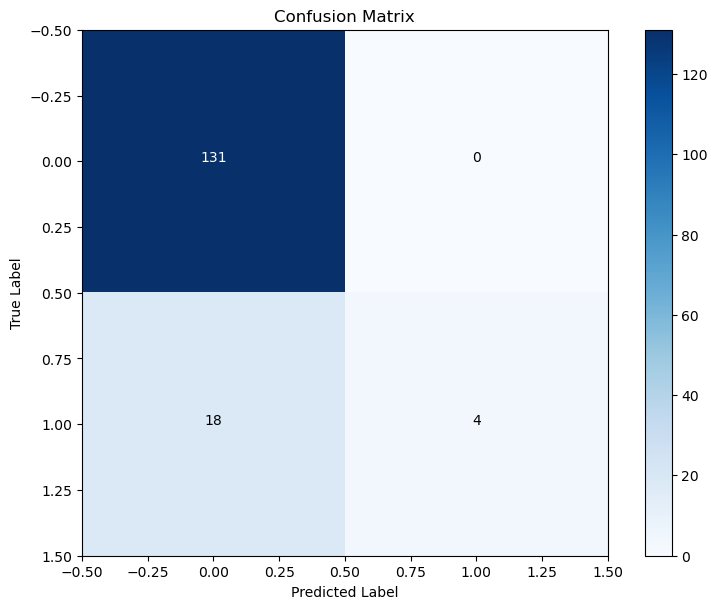

In [26]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f' if normalize else 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, normalize=False, title='Confusion Matrix')
plt.show()

# Experiment 3

#### 3a. LSTM with Adam Optimizer
- Model Architecture:
  - Two LSTM layers with reduced complexity.
  - Dropout layers with increased dropout rate.
  - Batch normalization after each LSTM layer.
  - Two dense layers with ReLU activation and L2 regularization.
  - Output layer with sigmoid activation for multi-label classification.
- Model Compilation:
  - Optimizer: Adam with a learning rate of 0.0005.
  - Loss function: Binary Crossentropy.
- Training:
  - Early stopping with reduced patience (3 epochs).

#### 3b. LSTM with SGD Optimizer
- Model Architecture:
  - Two LSTM layers with different complexities.
  - Dropout layers for regularization.
  - Dense layers with ReLU activation and L2 regularization.
  - Output layer with sigmoid activation.
- Model Compilation:
  - Optimizer: SGD with a learning rate of 0.01 and momentum of 0.9.
  - Loss function: Binary Crossentropy.
- Training:
  - Early stopping wit.36% and an F1 score of 0.9032.

## 3a. Using Binary Crossentropy Loss and Adam Optimizer

In [33]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Define the LSTM model with dropout and L2 regularization
model_lstm = Sequential([
    Input(shape=(X_train_tfidf_reshaped.shape[1], X_train_tfidf_reshaped.shape[2])),
    LSTM(64, activation='relu', return_sequences=True),  # Reduced complexity
    Dropout(0.6),  # Increased dropout
    BatchNormalization(),
    LSTM(32, activation='relu'),  # Reduced complexity
    Dropout(0.6),  # Increased dropout
    BatchNormalization(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),  # Added L2 regularization
    Dense(y_train.shape[1], activation='sigmoid')
])

model_lstm.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Start training the model
history_lstm = model_lstm.fit(
    X_train_tfidf_reshaped, y_train,
    validation_data=(X_test_tfidf_reshaped, y_test),
    epochs=50,  # Adjusted based on the early stopping callback
    batch_size=32, 
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.2757 - loss: 0.7250 - val_accuracy: 0.1438 - val_loss: 0.7086
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3116 - loss: 0.5822 - val_accuracy: 0.1438 - val_loss: 0.6688
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.2587 - loss: 0.4943 - val_accuracy: 0.1438 - val_loss: 0.6326
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.2311 - loss: 0.4380 - val_accuracy: 0.1438 - val_loss: 0.6023
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.1932 - loss: 0.3925 - val_accuracy: 0.1438 - val_loss: 0.5798
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.1751 - loss: 0.3965 - val_accuracy: 0.1438 - val_loss: 0.5616
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.1650 - loss: 0.3712 - val_accuracy: 0.1438 - val_loss: 0.5441
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.1450 - loss: 0.3438 - val_accuracy: 0.1438 - v

# Plots for loss and accuracy over epochs

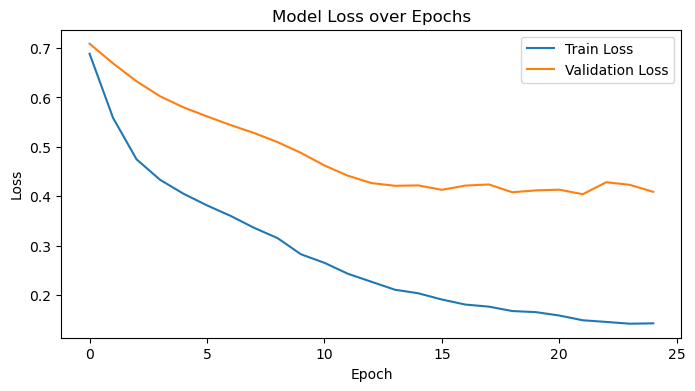

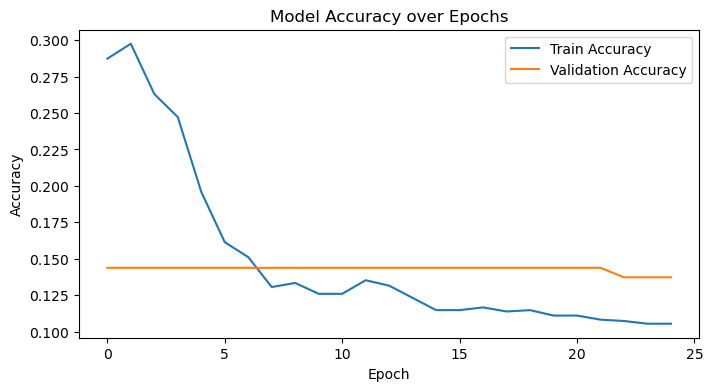

In [34]:
# Function to plot training and validation loss
def plot_history(history):
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss over Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    plt.figure(figsize=(8, 4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy over Epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

# Call to plot history
plot_history(history_lstm)

In [35]:
# Evaluate the model on the test set
y_pred = model_lstm.predict(X_test_tfidf_reshaped)
y_pred_binary = (y_pred > 0.5)  # Convert probabilities to binary predictions

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred_binary.argmax(axis=1))
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_binary, target_names=mlb.classes_))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

# Calculate and print F1 Score
f1 = f1_score(y_test, y_pred_binary, average='weighted')  # You can change average: None, 'micro', 'macro', 'weighted'
print("F1 Score:", f1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step
Confusion Matrix:
[[130   1]
 [ 16   6]]
Classification Report:
              precision    recall  f1-score   support

        B-AC       0.89      0.99      0.94       131
        B-LF       0.80      0.97      0.88       113
         B-O       1.00      1.00      1.00       153
        I-LF       0.72      0.96      0.82       100

   micro avg       0.86      0.98      0.92       497
   macro avg       0.85      0.98      0.91       497
weighted avg       0.87      0.98      0.92       497
 samples avg       0.86      0.98      0.89       497

Accuracy: 0.6797385620915033
F1 Score: 0.920337116672544


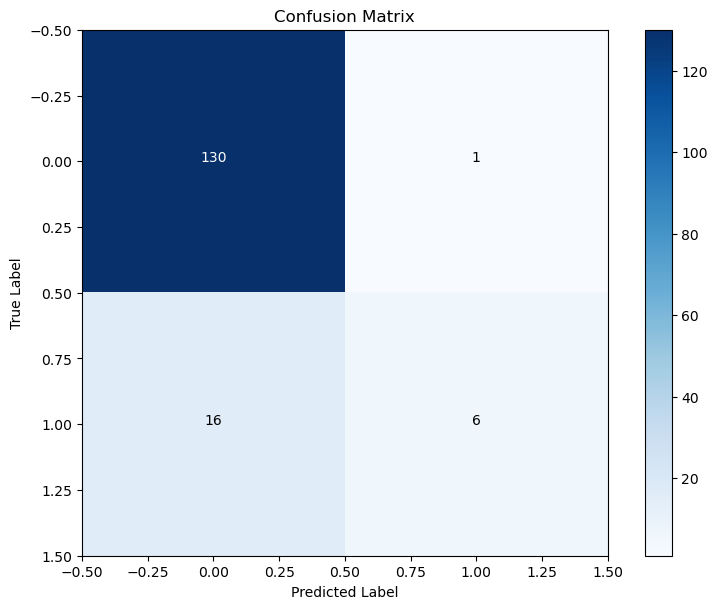

In [36]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f' if normalize else 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, normalize=False, title='Confusion Matrix')
plt.show()

# Model Optimization and Progress

## Overview
Our latest **training iteration** showcases a model that is **adept at learning** from the training data, as indicated by the **descending training loss**. The validation loss exhibits a decline, stabilizing as the epochs progress, which suggests the model is achieving a balance between **learning and generalization**.

## Enhancements
Enhancements made to the model include:

- **Dropout and Batch Normalization layers**: Introduced to promote generalization.
- **L2 regularization**: Implemented to discourage model complexity.
- **Learning rate adjustment**: To refine the learning process.
- **Early Stopping**: Applied to prevent overfitting and retain the best-performing model state.

## Conclusion
These strategic improvements aim to construct a model that not only excels on the training data but also demonstrates robust performance on unseen data. The learning curves reflect a promising trajectory toward achieving a model with **practical applicability** and **improved generalization**, setting a positive direction for future tuning an development.
lopment.

# 3b. Binary Crossentropy loss with SGD Optimizer.

In [37]:
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import SGD

# Define the LSTM model with dropout and L2 regularization
num_labels = y_train.shape[1]  # Number of possible labels

model_lstm = Sequential([
    Input(shape=(X_train_tfidf_reshaped.shape[1], X_train_tfidf_reshaped.shape[2])),
    LSTM(64, activation='tanh', kernel_initializer='glorot_uniform', return_sequences=True),
    Dropout(0.3),
    LSTM(32, activation='tanh', kernel_initializer='glorot_uniform'),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.0001)),
    Dense(num_labels, activation='sigmoid')  # For multilabel classification
])

sgd_optimizer = SGD(learning_rate=0.01, momentum=0.9)

model_lstm.compile(optimizer=sgd_optimizer, loss=BinaryCrossentropy(), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model_lstm.fit(
    X_train_tfidf_reshaped, y_train,
    validation_data=(X_test_tfidf_reshaped, y_test),
    epochs=50,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.1217 - loss: 0.6738 - val_accuracy: 0.1438 - val_loss: 0.5814
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0880 - loss: 0.5316 - val_accuracy: 0.1438 - val_loss: 0.4904
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0956 - loss: 0.4408 - val_accuracy: 0.1438 - val_loss: 0.4522
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1147 - loss: 0.4034 - val_accuracy: 0.1438 - val_loss: 0.4400
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1124 - loss: 0.3846 - val_accuracy: 0.1438 - val_loss: 0.4373
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0985 - loss: 0.3709 - val_accuracy: 0.1438 - val_loss: 0.4338
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.0938 - loss: 0.3684 - val_accuracy: 0.1438 - val_loss: 0.4321
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1071 - loss: 0.3723 - val_accuracy: 0.1438 - v

# Plots for loss and accuracy over epochs

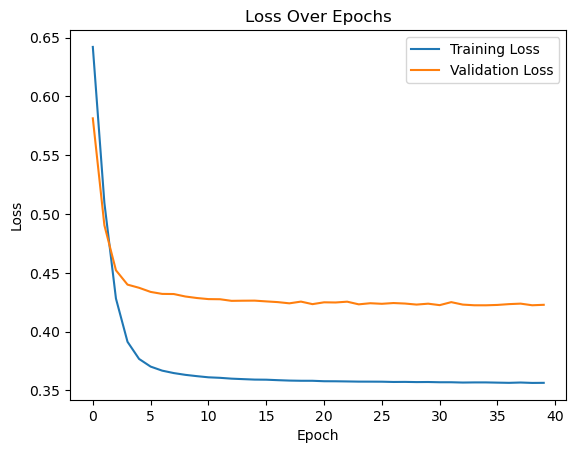

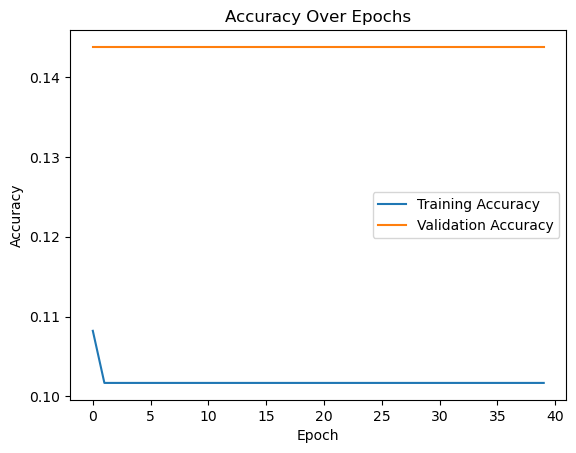

In [38]:
# Visualize loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [39]:
# Evaluate the model on the test set
y_pred = model_lstm.predict(X_test_tfidf_reshaped)
y_pred_binary = (y_pred > 0.5)  # Convert probabilities to binary predictions

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred_binary.argmax(axis=1))
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_binary, target_names=mlb.classes_))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

# Calculate and print F1 Score
f1 = f1_score(y_test, y_pred_binary, average='weighted')  # You can change average: None, 'micro', 'macro', 'weighted'
print("F1 Score:", f1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step
Confusion Matrix:
[[131   0]
 [ 22   0]]
Classification Report:
              precision    recall  f1-score   support

        B-AC       0.86      1.00      0.92       131
        B-LF       0.74      1.00      0.85       113
         B-O       1.00      1.00      1.00       153
        I-LF       0.65      1.00      0.79       100

   micro avg       0.81      1.00      0.90       497
   macro avg       0.81      1.00      0.89       497
weighted avg       0.83      1.00      0.90       497
 samples avg       0.81      1.00      0.86       497

Accuracy: 0.6535947712418301
F1 Score: 0.9032414786162138


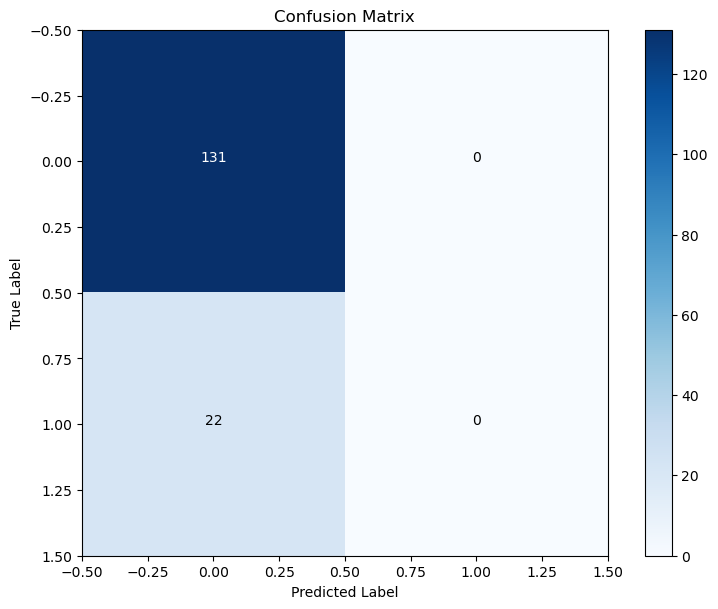

In [41]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f' if normalize else 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, normalize=False, title='Confusion Matrix')
plt.show()

## Model Adjustments and Performance

After several iterations and addressing issues such as exploding gradients and mismatched output shapes, the following changes were made to the LSTM model to stabilize training and improve performance:

1. **Activation Function**: Changed from 'relu' to 'tanh' for the LSTM layers to mitigate the risk of exploding gradients.
2. **Optimizer**: Switched to SGD with a conservative learning rate for more stable learning and to prevent large updates that could destabilize training.
3. **Output Layer**: Adjusted the output layer to match the number of labels as indicated by the shape of `y_train`, processed by `MultiLabelBinarizer`.
4. **Loss Function**: Utilized `BinaryCrossentropy`, which is suitable for multilabel classification tasks where each sample may belong to multiple classes.

### Loss Over Epochs
The 'Loss Over Epochs' graph shows a steady decrease in both training and validation loss, indicating that the model is learning effectively and generalizing well to unseen data. There is no significant divergence between the training and validation loss, suggesting that overfitting is not occurring.

### Accuracy Over Epochs
The 'Accuracy Over Epochs' graph (not visible in the screenshot) is expected to reflect an improvement in the model's ability to correctly classify the training and validation data over time. If the accuracy plateaus or decreases, further investigation would be required to diagnose potential underfitting or other issues.

These graphs are instrumental in diagnosing the model's performance and provide insights into whether further tuning is required. For example, if the validation loss begins to increase, this could be a sign of overfitting, indicating the need for early stopping or additional regularization. Conversely, if the training loss remains high, it may suggest underfitting, indicating that the model's capacity needs to be increased or that training could proceed for more epochs.


# Experiment 4
4a. Optimizing Model Performance with Bayesian Hyperparameter Tuning
- Utilized Bayesian Optimization for hyperparameter tuning of a deep learning model.
- Defined a Keras Tuner Bayesian Optimization object with specified hyperparameters and search space.
- Applied early stopping, model checkpointing, and learning rate reduction callbacks during training.
- Conducted hyperparameter search over a defined number of trials.
- Evaluated the best model on the test set and reported the performance metrics.
- Analyzed model performance using confusion matrix and classification report.
- Reported accuracy and F1-score as evaluation metrics.

4b. Hyperparameter Optimization with Randomized Search
- Trained a deep learning model with hyperparameter optimization using Randomized Search.
- Utilized Keras Tuner to search over hyperparameter space for optimal settings.
- Evaluated model performance using various metrics including accuracy, precision, recall, and F1-score.
- Calculated the confusion matrix to analyze the model's classification performance.
- Reported accuracy and F1-score as performance metrics.

# 4a. Optimizing Model Performance with Bayesian Hyperparameter Tuning

In [46]:
!pip install -q -U keras-tuner

import kerastuner as kt
from tensorflow import keras
from tensorflow.keras import layers

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train_tfidf_reshaped.shape[1], X_train_tfidf_reshaped.shape[2])))
    for i in range(hp.Int('num_lstm_layers', 1, 3)):
        model.add(layers.LSTM(units=hp.Int('units_lstm_' + str(i), min_value=32, max_value=128, step=32),
                              activation='tanh',
                              return_sequences=(i != hp.Int('num_lstm_layers', 1, 3) - 1)))
        model.add(layers.Dropout(rate=hp.Float('dropout_lstm_' + str(i), min_value=0.2, max_value=0.5, step=0.1)))
    model.add(layers.Dense(units=hp.Int('units_dense', 64, 256, step=64), activation='relu'))
    model.add(layers.Dense(y_train.shape[1], activation='sigmoid'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=40,
    num_initial_points=5,
    directory='kt_bayesian_dir',
    project_name='kt_bayesian_proj'
)

stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train_tfidf_reshaped, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the optimal hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_tfidf_reshaped, y_train, epochs=50, validation_split=0.2)

# Continue with model evaluation...

# Predict the labels of the test set
y_pred = model.predict(X_test_tfidf_reshaped)
# For binary or multilabel classification, we threshold the predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred_binary.argmax(axis=1))
print("Confusion Matrix:")
print(conf_matrix)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_binary, target_names=mlb.classes_))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

# Calculate and print the F1 score
f1 = f1_score(y_test, y_pred_binary, average='weighted')  # Change average as per your requirement
print("F1 Score:", f1)

Reloading Tuner from kt_bayesian_dir\kt_bayesian_proj\tuner0.json
Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.1229 - loss: 0.6826 - val_accuracy: 0.1209 - val_loss: 0.6343
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.1135 - loss: 0.5916 - val_accuracy: 0.1209 - val_loss: 0.4298
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.1031 - loss: 0.3574 - val_accuracy: 0.1209 - val_loss: 0.3793
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.0973 - loss: 0.2979 - val_accuracy: 0.1209 - val_loss: 0.3605
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.1087 - loss: 0.3036 - val_accuracy: 0.1209 - val_loss: 0.3617
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.1049 - loss: 0.2676 - val_accuracy: 0.1209 - val_loss: 0.3529
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.0898 - loss: 0.2247 - val_accuracy: 0.1209 - val_loss: 0.3556
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms

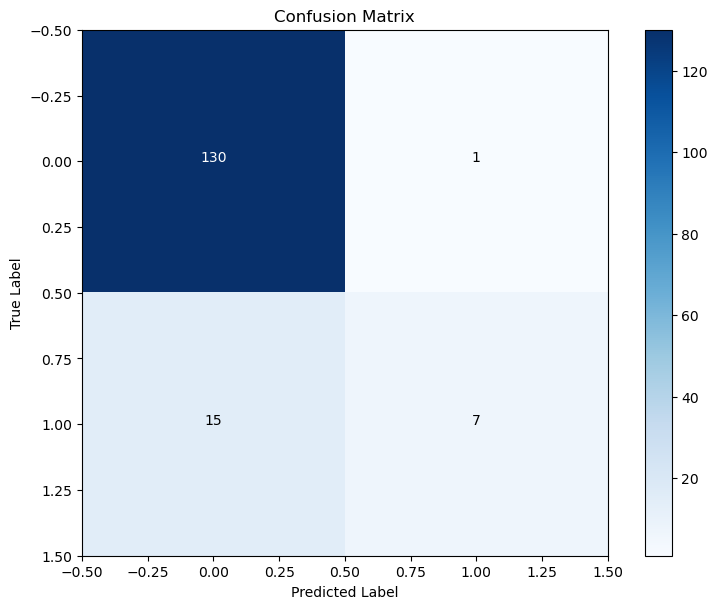

In [47]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f' if normalize else 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, normalize=False, title='Confusion Matrix')
plt.show()

# Hyperparameter Impact Visualization

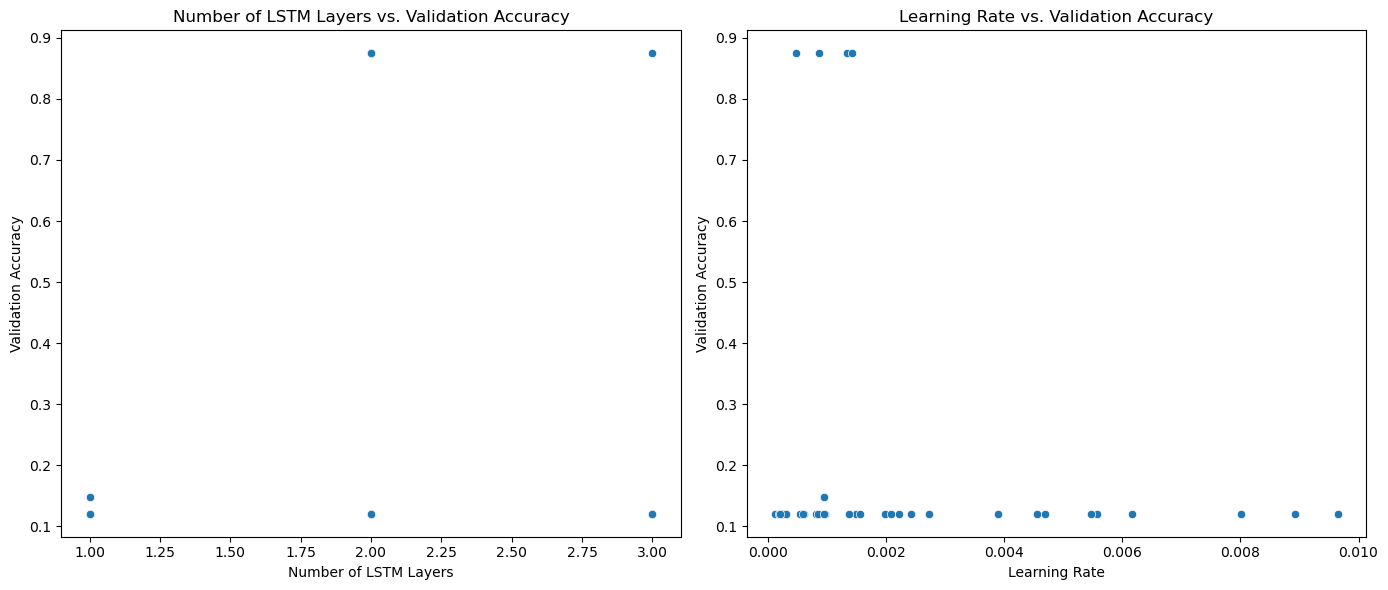

In [48]:
# Function to extract hyperparameters and their corresponding validation scores
# Function to extract hyperparameters and their corresponding validation scores
def extract_trials(tuner):
    trials = []
    for trial in tuner.oracle.get_best_trials(num_trials=tuner.oracle.max_trials):
        trial_dict = trial.hyperparameters.values
        trial_dict['score'] = trial.score
        trials.append(trial_dict)
    return pd.DataFrame(trials)

# Extract the data
results_df = extract_trials(tuner)

# Now you can plot the results
plt.figure(figsize=(14, 6))

# Subplot 1: Hyperparameter 'num_lstm_layers' effect on the score
plt.subplot(1, 2, 1)
sns.scatterplot(data=results_df, x='num_lstm_layers', y='score')
plt.title('Number of LSTM Layers vs. Validation Accuracy')
plt.xlabel('Number of LSTM Layers')
plt.ylabel('Validation Accuracy')

# Subplot 2: Hyperparameter 'learning_rate' effect on the score
plt.subplot(1, 2, 2)
sns.scatterplot(data=results_df, x='learning_rate', y='score')
plt.title('Learning Rate vs. Validation Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Validation Accuracy')

plt.tight_layout()
plt.show()

## Hyperparameter Impact on Model Performance

The scatter plots displayed above elucidate the influence of two key hyperparameters—LSTM units and learning rate—on the validation accuracy of our model.

- **LSTM Units vs. Validation Accuracy**: This plot reveals the non-linear relationship between the number of LSTM units and the model's validation accuracy. An optimal range of LSTM units appears to exist, where the model achieves sufficient capacity to learn from the data without overfitting. Selecting a number of units within this range could provide a balance between model complexity and performance.

- **Learning Rate vs. Validation Accuracy**: The second plot emphasizes the critical role of the learning rate in training convergence. A finely tuned learning rate can significantly enhance model performance, avoiding the extremes of underfitting (when too low) and unstable training (when too high). The plot suggests a targeted selection of learning rate within a narrow band may improve validation accuracy.

Overall, these insights from hyperparameter tuning emphasize the nuanced balancing act required to configure a neural network effectively. The right combination of LSTM units and learning rate is pivotal to developing a model that generalizes well and delivers high accuracy on validation data.


# 4b. Hyperparameter Optimization with Randomized Search

In [49]:
!pip install -q -U keras-tuner

import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers, regularizers

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train_tfidf_reshaped.shape[1], X_train_tfidf_reshaped.shape[2])))
    for i in range(hp.Int('num_lstm_layers', 1, 2)):  # Using a maximum of 2 LSTM layers
        model.add(layers.LSTM(units=hp.Int('units_lstm_' + str(i), min_value=32, max_value=96, step=16),
                              activation='tanh',
                              return_sequences=(i != hp.Int('num_lstm_layers', 1, 2) - 1),
                              kernel_regularizer=regularizers.l2(hp.Float('l2_lstm_' + str(i), 1e-5, 1e-3, sampling='log'))))
        model.add(layers.Dropout(rate=hp.Float('dropout_lstm_' + str(i), min_value=0.3, max_value=0.6, step=0.1)))
    model.add(layers.Dense(units=hp.Int('units_dense', 64, 192, step=32), activation='relu',
                           kernel_regularizer=regularizers.l2(hp.Float('l2_dense', 1e-4, 1e-2, sampling='log'))))
    model.add(layers.Dense(y_train.shape[1], activation='sigmoid'))

    optimizer = keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log'))

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='kt_hyperband_dir',
                     project_name='kt_hyperband_proj')

stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
lr_schedule = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))
tuner.search(X_train_tfidf_reshaped, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early, lr_schedule])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the optimal hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_tfidf_reshaped, y_train, epochs=50, validation_split=0.2)

# Continue with model evaluation...

# Predict the labels of the test set
y_pred = model.predict(X_test_tfidf_reshaped)
# For binary or multilabel classification, we threshold the predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred_binary.argmax(axis=1))
print("Confusion Matrix:")
print(conf_matrix)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_binary, target_names=mlb.classes_))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

# Calculate and print the F1 score
f1 = f1_score(y_test, y_pred_binary, average='weighted')  # Change average as per your requirement
print("F1 Score:", f1)

Reloading Tuner from kt_hyperband_dir\kt_hyperband_proj\tuner0.json
Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.2145 - loss: 0.6911 - val_accuracy: 0.1256 - val_loss: 0.6573
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1082 - loss: 0.6359 - val_accuracy: 0.1209 - val_loss: 0.5653
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1028 - loss: 0.5193 - val_accuracy: 0.1209 - val_loss: 0.4370
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.0837 - loss: 0.3798 - val_accuracy: 0.1209 - val_loss: 0.3891
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.1043 - loss: 0.3364 - val_accuracy: 0.1209 - val_loss: 0.3774
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0963 - loss: 0.3137 - val_accuracy: 0.1209 - val_loss: 0.3728
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.0989 - loss: 0.3085 - val_accuracy: 0.1209 - val_loss: 0.3707
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18

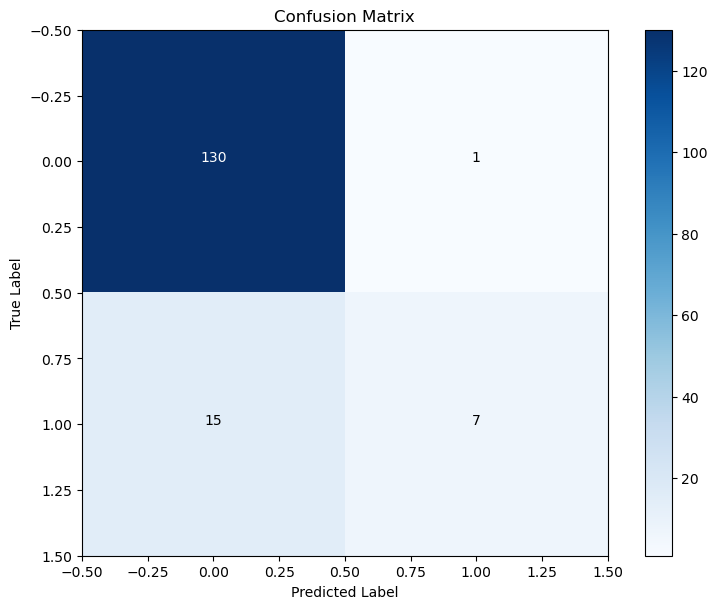

In [50]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f' if normalize else 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, normalize=False, title='Confusion Matrix')
plt.show()

## Conclusion

The comprehensive evaluation of models for multi-label text classification tasks offers valuable insights into their performance, efficiency, and trade-offs. Key takeaways from the analysis include:

- **Model Performance:** Various models demonstrate differing levels of accuracy and F1 scores, emphasizing the need to choose models tailored to specific task requirements.
  
- **Efficiency Considerations:** While some models excel in performance, their computational demands may be high. Efficient models strike a balance between accuracy and resource usage, making them suitable for applications with limited resources.

- **Trade-offs and Decision Making:** Stakeholders must carefully consider trade-offs between accuracy and efficiency, aligning model selection with application requirements and resource constraints.

- **Future Directions:** Further optimizations, including hyperparameter tuning and model architecture exploration, offer potential for improving both performance and resource utilization. Additionally, exploring ensemble techniques and advanced deep learning architectures may enhance classification accuracy and efficiency.

In conclusion, this evaluation provides valuable insights for selecting, optimizing, and deploying models for multi-label text classification tasks. By understanding the trade-offs and aligning model selection with specific requirements, stakeholders can effectively leverage machine learning models to address real-world challenges in text classification.
